# Exploring Data Lab

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

## Collect and Wrangle Data

In [23]:
df = pd.read_csv('./Datasets/wheat.data', index_col=0)
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [11]:
area_perimeter = df[['area', 'perimeter']]
groove_asym = df[['groove', 'asymmetry']]

In [9]:
area_perimeter.head()

,area,perimeter
id,,
0,15.26,14.84
1,14.88,14.57
2,14.29,14.09
3,13.84,13.94
4,16.14,14.99


In [13]:
groove_asym.head()

,groove,asymmetry
id,,
0,5.220,2.221
1,4.956,1.018
2,4.825,2.699
3,4.805,2.259
4,5.175,1.355


## Histograms

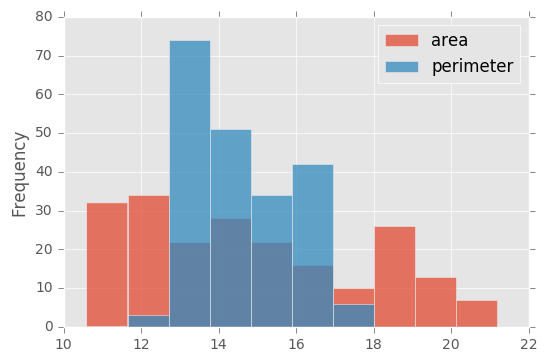

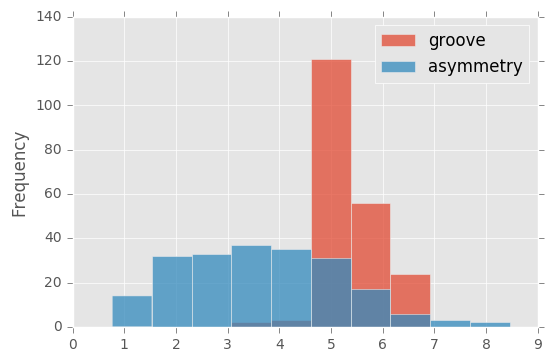

In [15]:
area_perimeter.plot.hist(alpha=0.75)
groove_asym.plot.hist(alpha=0.75)

## Scatter Plots

In [18]:
compact_width = df[['compactness', 'width']]

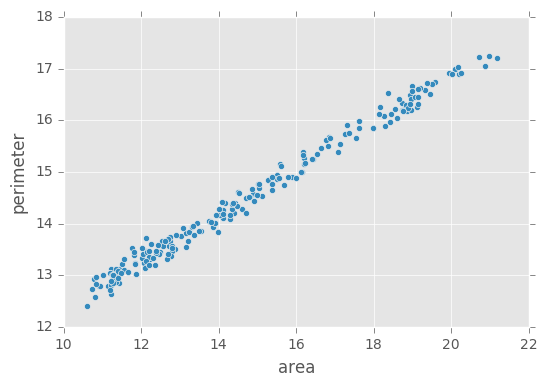

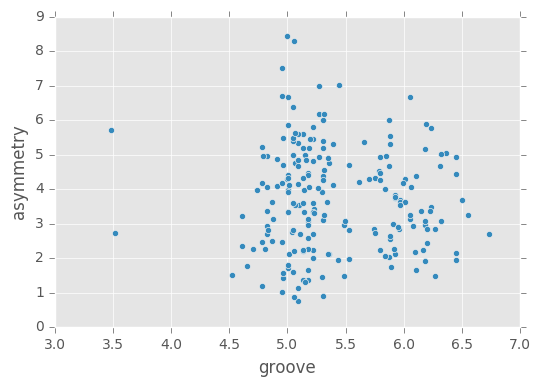

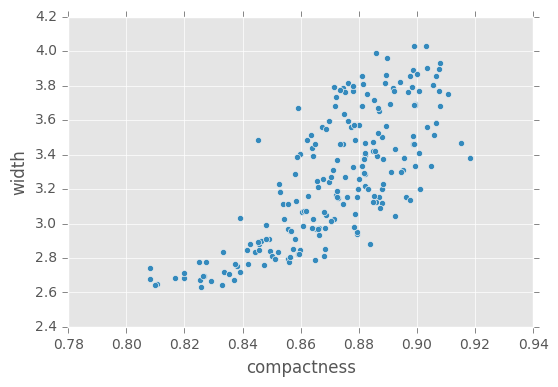

In [21]:
df.plot.scatter(x='area', y='perimeter')
df.plot.scatter(x='groove', y='asymmetry')
df.plot.scatter(x='compactness', y='width')

## 3D Scatter Plot

In [25]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
# required for manipulating the 3d chart
%matplotlib qt5

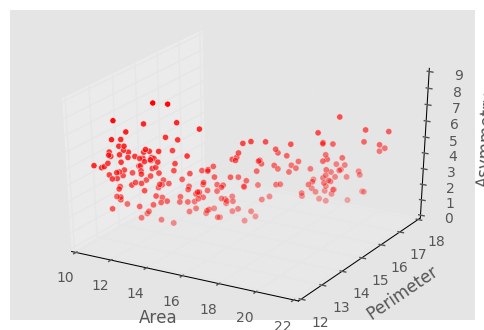

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Asymmetry')
ax.scatter(df.area, df.perimeter, df.asymmetry, c='red')
plt.show()

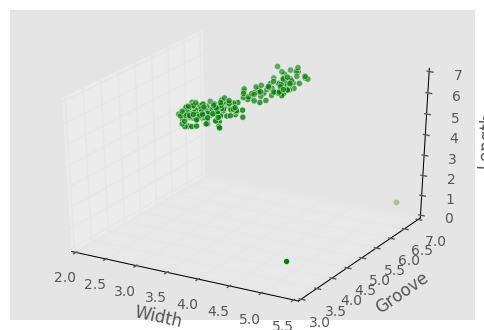

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Width')
ax.set_ylabel('Groove')
ax.set_zlabel('Length')
ax.scatter(df.width, df.groove, df.length, c='green')
plt.show()

## Parallel Coordinates

In [35]:
from pandas.tools.plotting import parallel_coordinates, andrews_curves

In [36]:
df.columns

Index([u'area', u'perimeter', u'compactness', u'length', u'width',
       u'asymmetry', u'groove', u'wheat_type'],
      dtype='object')

In [38]:
lean_df = df[[u'compactness', u'length', u'width',
       u'asymmetry', u'groove', u'wheat_type']]

In [39]:
lean_df.columns

Index([u'compactness', u'length', u'width', u'asymmetry', u'groove',
       u'wheat_type'],
      dtype='object')

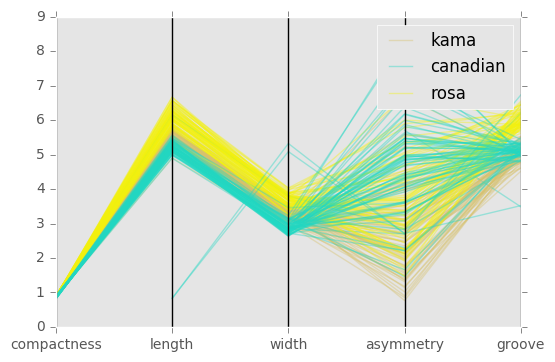

In [43]:
plt.figure()
parallel_coordinates(lean_df, 'wheat_type', alpha=0.4)
plt.show()

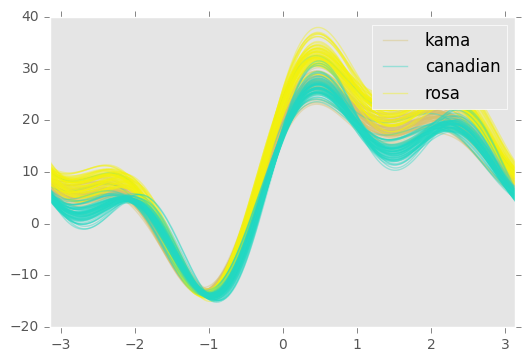

In [45]:
plt.figure()
andrews_curves(df, 'wheat_type', alpha=0.4)
plt.show()

## Correlations

In [47]:
df.corr()

,area,perimeter,compactness,length,width,asymmetry,groove
area,1.000000,0.994341,0.600312,0.645418,0.801616,-0.205876,0.786096
perimeter,0.994341,1.000000,0.520544,0.657490,0.783188,-0.196360,0.813256
compactness,0.600312,0.520544,1.000000,0.360060,0.756165,-0.315668,0.236184
length,0.645418,0.657490,0.360060,1.000000,0.197228,-0.102325,0.669887
width,0.801616,0.783188,0.756165,0.197228,1.000000,-0.249378,0.619865
asymmetry,-0.205876,-0.196360,-0.315668,-0.102325,-0.249378,1.000000,-0.039248
groove,0.786096,0.813256,0.236184,0.669887,0.619865,-0.039248,1.000000


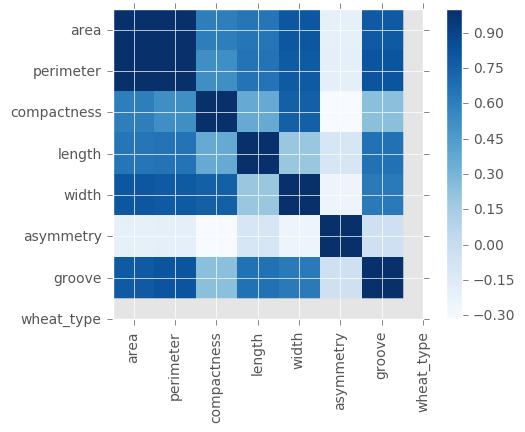

In [48]:
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()